In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from collections import Counter

In [2]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10) 
y_test_cat = keras.utils.to_categorical(y_test, 10)

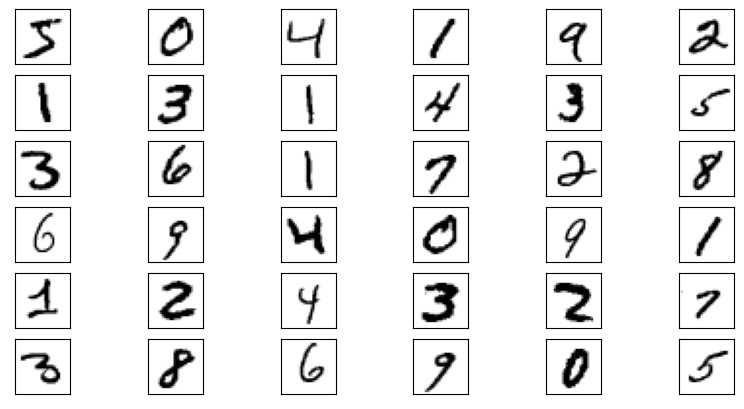

In [5]:
plt.figure(figsize=(10, 5))

for i in range(36):
    plt.subplot(6, 6, i + 1)

    plt.xticks([])

    plt.yticks([])

    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [6]:
model = keras.Sequential([ Flatten(input_shape=(28, 28)), Dense(128, activation='relu'), Dense(10, activation='softmax') ])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2590 - accuracy: 0.9263 - val_loss: 0.1446 - val_accuracy: 0.9561
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1152 - accuracy: 0.9661 - val_loss: 0.0978 - val_accuracy: 0.9709
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0795 - accuracy: 0.9755 - val_loss: 0.0923 - val_accuracy: 0.9702
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0585 - accuracy: 0.9825 - val_loss: 0.0799 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0794 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0815 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0850 - val_accuracy:

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9768
Test accuracy: 0.9768000245094299


In [11]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 624us/step


In [12]:
predicted_label = np.argmax(predictions[0])  # Get the highest probability index
print("Predicted Label:", predicted_label)

Predicted Label: 7


313/313 [==============================] - 0s 604us/step


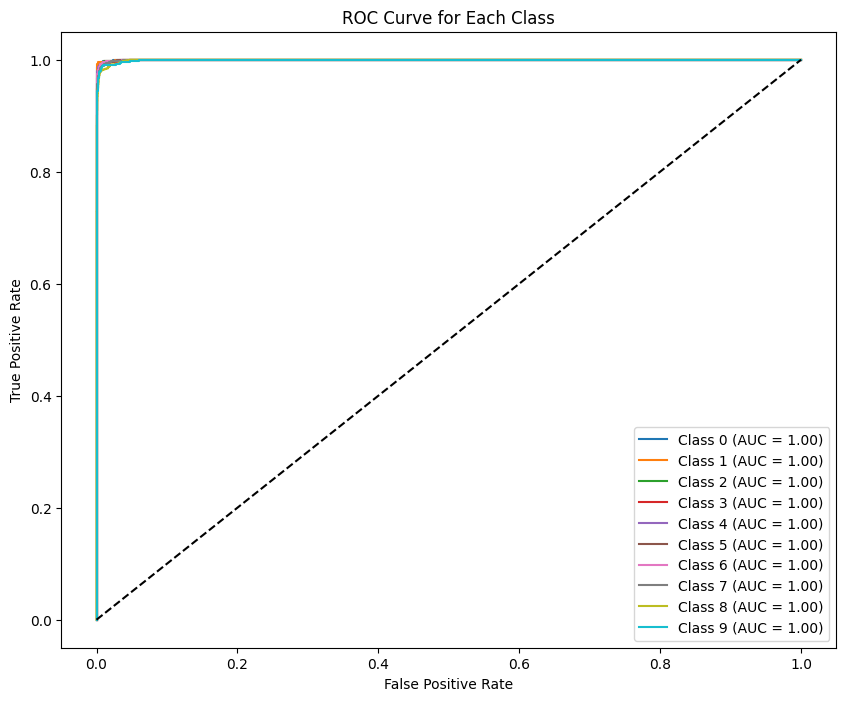

In [16]:
# Convert labels to one-hot encoding
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_pred_probs = model.predict(x_test)
# Create ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(10):  # Loop through all 10 classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend()
plt.show()

In [17]:
# Get predicted labels (index with highest probability)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Find misclassified examples
misclassified = y_pred_labels != y_test

In [27]:
# Count how many times each class was misclassified
wrong_counts = Counter(y_test[misclassified])

# Find the class with the most mistakes
most_misclassified = max(wrong_counts, key=wrong_counts.get)

print("Digit with the Most Mistakes:", most_misclassified)
print("Number of Mistakes:", wrong_counts[most_misclassified])

# Find the digit with the fewest mistakes
least_misclassified = min(wrong_counts, key=wrong_counts.get)

print("Digit with the Least Mistakes:", least_misclassified)
print("Number of Mistakes:", wrong_counts[least_misclassified])


Digit with the Most Mistakes: 2
Number of Mistakes: 36
Digit with the Least Mistakes: 1
Number of Mistakes: 6


In [26]:
# Find indices where the true label is 2 but the model predicted something else
misclassified_twos = np.where((y_test == 2) & (y_pred_labels != 2))[0]

# Get the first 20 misclassified "twos"
first_20_twos = misclassified_twos[:20]

print("Indices of first 20 misclassified twos:", first_20_twos)

Indices of first 20 misclassified twos: [ 149  321  659 1050 1395 1609 1790 2098 2299 2488 3021 3330 3474 3681
 3796 3946 4176 4248 4289 4384]


In [28]:
# Find indices where the true label is 1 but the model predicted something else
misclassified_ones = np.where((y_test == 1) & (y_pred_labels != 1))[0]

# Get the first 20 misclassified "twos"
first_6_ones = misclassified_ones[:20]

print("Indices of first 6 misclassified ones:", first_6_ones)

Indices of first 6 misclassified ones: [2182 3073 3906 4201 5457 5642]


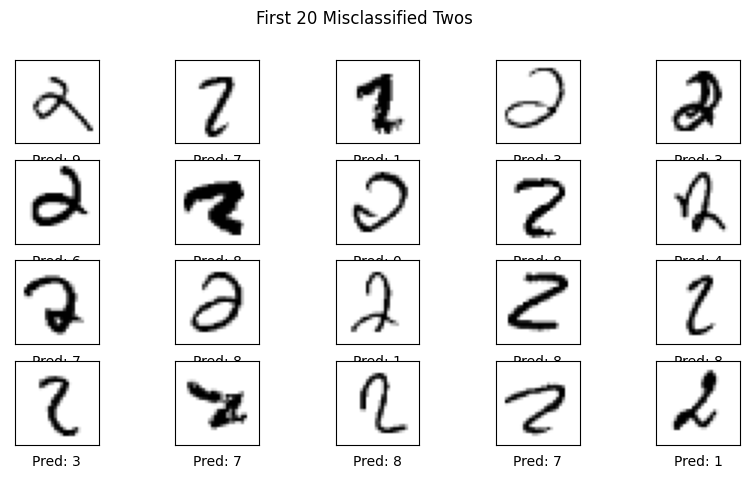

In [25]:
plt.figure(figsize=(10, 5))

for i, idx in enumerate(first_20_twos):
    plt.subplot(4, 5, i + 1)  # Arrange in 4 rows, 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {y_pred_labels[idx]}")  # Show predicted label

plt.suptitle("First 20 Misclassified Twos")
plt.show()

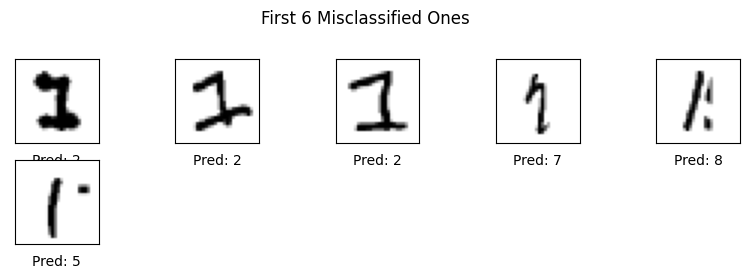

In [30]:
plt.figure(figsize=(10, 5))

for i, idx in enumerate(first_6_ones):
    plt.subplot(4, 5, i + 1)  # Arrange in 4 rows, 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {y_pred_labels[idx]}")  # Show predicted label

plt.suptitle("First 6 Misclassified Ones")
plt.show()

In [31]:
model.save("my_digit_model.h5") 